## Q1. Perform basic EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore

In [3]:
# Load dataset
data = pd.read_csv('/content/house_price.csv')
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
data.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0
bhk,0
price_per_sqft,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [8]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
# Convert `size` to numerical (Extract the number from '2 BHK' -> 2)
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [10]:
# Convert `total_sqft` to numerical (Handle ranges)
def convert_sqft(value):
    try:
        if '-' in value:  # Handling range values like "1200-1500"
            vals = list(map(float, value.split('-')))
            return sum(vals) / 2  # Take average
        return float(value)
    except:
        return np.nan  # Return NaN for non-numeric values

data['total_sqft'] = data['total_sqft'].astype(str).apply(convert_sqft)

In [11]:
# Drop rows with missing values after conversion
data.dropna(inplace=True)

## Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

In [12]:
## Mean and Standard Deviation Method
price_per_sqft = data['price_per_sqft']
mean = price_per_sqft.mean()
std = price_per_sqft.std()

lower_limit, upper_limit = mean - 3 * std, mean + 3 * std
data_mean_std = data[(price_per_sqft >= lower_limit) & (price_per_sqft <= upper_limit)]

In [13]:
## Percentile Method (5th and 95th percentile)

Q1 = price_per_sqft.quantile(0.25)
Q3 = price_per_sqft.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_percentile = data[(price_per_sqft >= lower_bound) & (price_per_sqft <= upper_bound)]

In [14]:
## Z-Score Method

z_scores = zscore(price_per_sqft)
threshold = 3

data_zscore = data[(z_scores > -threshold) & (z_scores < threshold)]

##Q3. Box Plot to Compare Outlier Removal Methods

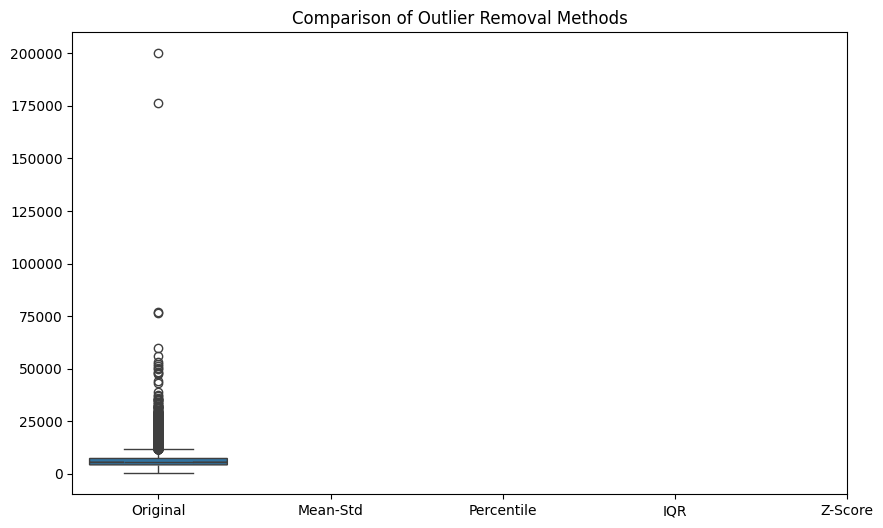

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data['price_per_sqft'],
                  data_mean_std['price_per_sqft'],
                  data_percentile['price_per_sqft'],
                  data_percentile['price_per_sqft'],
                  data_zscore['price_per_sqft']],
            notch=True)
plt.xticks([0, 1, 2, 3, 4], ['Original', 'Mean-Std', 'Percentile', 'IQR', 'Z-Score'])
plt.title("Comparison of Outlier Removal Methods")
plt.show()


## Q4.Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed.

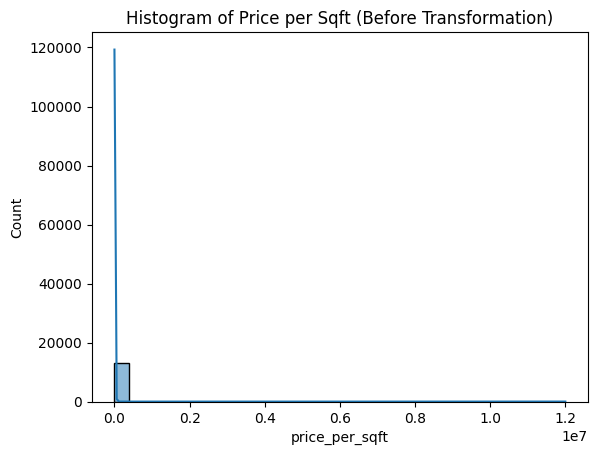

In [16]:
# Histogram before transformation
sns.histplot(data['price_per_sqft'], kde=True, bins=30)
plt.title("Histogram of Price per Sqft (Before Transformation)")
plt.show()

In [17]:
# Calculate skewness & kurtosis before transformation
print("Skewness Before:", skew(data['price_per_sqft']))
print("Kurtosis Before:", kurtosis(data['price_per_sqft']))

Skewness Before: 108.26875024325159
Kurtosis Before: 12090.633538860382


In [18]:
# Apply Log Transformation
data['price_per_sqft_log'] = np.log1p(data['price_per_sqft'])

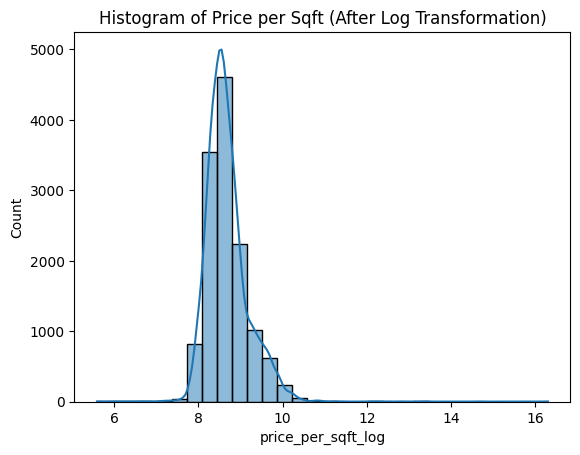

In [19]:
# Histogram after transformation
sns.histplot(data['price_per_sqft_log'], kde=True, bins=30)
plt.title("Histogram of Price per Sqft (After Log Transformation)")
plt.show()

In [20]:
# Calculate skewness & kurtosis after transformation
print("Skewness After:", skew(data['price_per_sqft_log']))
print("Kurtosis After:", kurtosis(data['price_per_sqft_log']))

Skewness After: 1.4003259019533636
Kurtosis After: 9.203000543610957


## Q5. Check the correlation between all the numerical columns and plot heatmap.

In [21]:
# Correlation matrix
corr_matrix = data[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']].corr()

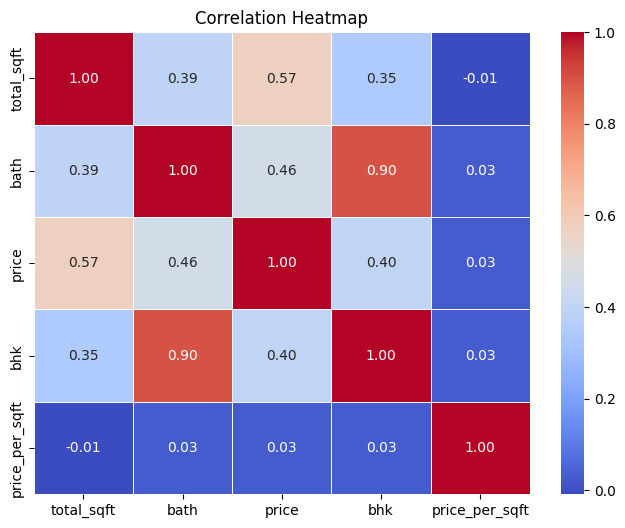

In [22]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Q6. Draw Scatter plot between the variables to check the correlation between them.

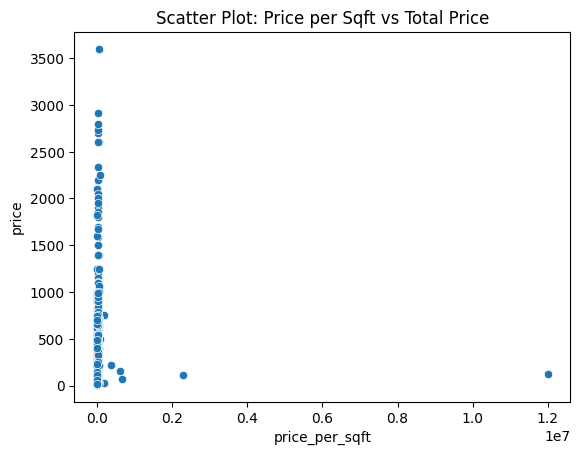

In [23]:
# Scatter plot between price per sqft and total price
sns.scatterplot(x=data['price_per_sqft'], y=data['price'])
plt.title("Scatter Plot: Price per Sqft vs Total Price")
plt.show()

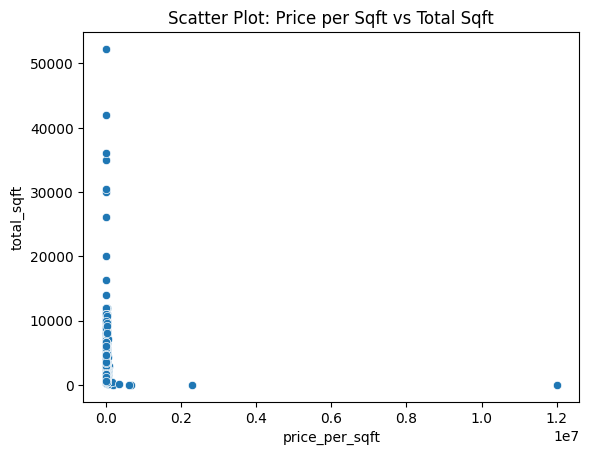

In [24]:
# Scatter plot between price per sqft and size (sqft area)
sns.scatterplot(x=data['price_per_sqft'], y=data['total_sqft'])
plt.title("Scatter Plot: Price per Sqft vs Total Sqft")
plt.show()

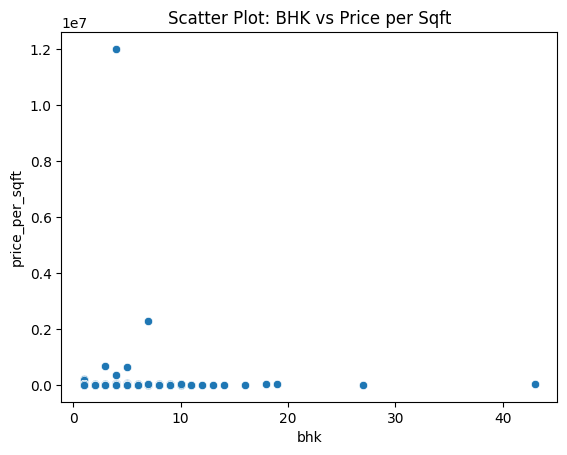

In [25]:
# Scatter plot between BHK and price per sqft
sns.scatterplot(x=data['bhk'], y=data['price_per_sqft'])
plt.title("Scatter Plot: BHK vs Price per Sqft")
plt.show()